# **Kütüphanelerin Import Edilmesi**

In [186]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Bilgi İçermeyen kelimeleri çıkaracağımız kütüphaneyi indirelim.**

In [189]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Tokenization işlemi için gerekli kütüphanelerin indirilmesi.**

In [190]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Lemmatization işlemi için gerekli kütüphanelerin indirilmesi.**

In [191]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [192]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [193]:
#################################################################################
# Sınıflandırma Problemleri için Algoritmaların Impoer Edilmesi.
#################################################################################

# 1.Lojistik Regresyon - (Logistic Regression) (LR) Algortiması için Kütüphanenin Import Edilmesi.
from sklearn.linear_model import LogisticRegression

# 2.Rastgele Ormanlar (Random Forests) (RF) Algoritması için Kütüphanenin Import Edilmesi.
from sklearn.ensemble import RandomForestClassifier

#################################################################################
# Veri Manipülasyonu ve Matematiksel Hesaplamalar için Kütüphanelerin Import Edilmesi.
#################################################################################
import pandas as pd
import numpy as np

#################################################################################
# Grafik Çizimleri ve Görselleştirme için Kütüphanelerin Import Edilmesi.
#################################################################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image

#################################################################################
# Doğal Dil İşleme (Natural Language Processing - NLP)  Üzerine Kütüphanelerin Import Edimesi
#################################################################################
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud
import nltk

#################################################################################
# Model Seçme İşlemleri için Kütüphanelerin Import Edilmesi
#################################################################################
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.model_selection import cross_validate, validation_curve, GridSearchCV
from sklearn import model_selection

#################################################################################
# Encode İşlemleri için Gerekli Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.preprocessing import LabelEncoder

#################################################################################
# Başarı Değerlendirme için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

#################################################################################
# Çıktı göründüleri için ayarlamaların yapılması.
#################################################################################
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

#################################################################################
# Bazı Uyarıları Almamak için Kütüpanelerin Import Edilmesi.
#################################################################################
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=Warning) #Olası bazı hataları ignore ediyoruz, görmezden geliyoruz.

# **İş Problemi**

Wikipedia metinleri içeren veri setine metin ön işleme ve görselleştirme yapınız.


# **Proje Görevleri**

## **Görev 1 : Metin Ön İşleme İşlemlerini Gerçekleştiriniz**

In [194]:
df = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/4.Doğal Dil İşlemeye Giriş/2.Proje: WIKIMEDIA Metin Ön İşleme ve Görselleştirme/wiki_data/wiki_data.csv")

In [195]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


**Projeye başlamadan önce rahat çalışabilmek için değişken isimlerini tek tip yazı boyutuna getirelim.**

In [196]:
df.columns = [col.upper() for col in df.columns]

In [197]:
df.head()

,UNNAMED: 0,TEXT
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


### **Adım 1:** Metin ön işleme için clean_text adında fonksiyon oluşturunuz. Fonksiyon;

• Büyük küçük harf dönüşümü,

• Noktalama işaretlerini çıkarma,

• Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.

In [198]:
def clean_text(dataframe, text_col, lower = True):

  # Büyük küçük harf dönüşümü.
  if lower:
    dataframe[text_col] = dataframe[text_col].str.lower()
  else:
    dataframe[text_col] = dataframe[text_col].str.upper()

  # Noktalama işaretlerini çıkarınız.
  dataframe[text_col] = dataframe[text_col].str.replace("[^\w\s]", " ")

  # Alt satıra geçmek için kullanılan \n ifadesinin çıkarılması.
  dataframe[text_col] = dataframe[text_col].str.replace("\n\n", " ")

  # Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.
  dataframe[text_col] = dataframe[text_col].str.replace("\d", " ")

  return dataframe


### **Adım 2:** Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

**Tüm gözlemleri büyük harf olarak gözlemleyelim.**

In [199]:
clean_text(df, "TEXT", lower = False).head()

,UNNAMED: 0,TEXT
0,1,ANOVO ANOVO FORMERLY A NOVO IS A COMPUTER SE...
1,2,BATTERY INDICATOR A BATTERY INDICATOR ALSO KN...
2,3,BOB PEASE ROBERT ALLEN PEASE AUGUST Â...
3,4,CAVNET CAVNET WAS A SECURE MILITARY FORUM WHIC...
4,5,CLIDAR THE CLIDAR IS A SCIENTIFIC INSTRUMENT U...


**Tüm gözlemleri küçük harf olarak gözlemleyelim ve df değişkenine atayarak güncelleyelim..**

In [200]:
clean_text(df, "TEXT", lower = True).head()

,UNNAMED: 0,TEXT
0,1,anovo anovo formerly a novo is a computer se...
1,2,battery indicator a battery indicator also kn...
2,3,bob pease robert allen pease august â...
3,4,cavnet cavnet was a secure military forum whic...
4,5,clidar the clidar is a scientific instrument u...


In [201]:
df = clean_text(df, "TEXT", lower = True)

In [202]:
df.head()

,UNNAMED: 0,TEXT
0,1,anovo anovo formerly a novo is a computer se...
1,2,battery indicator a battery indicator also kn...
2,3,bob pease robert allen pease august â...
3,4,cavnet cavnet was a secure military forum whic...
4,5,clidar the clidar is a scientific instrument u...


### **Adım 3:** Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

* Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız.

* 1'den az geçen kelimeleri veriden çıkarınız.

* Lemmatization işlemini uygulayınız.


In [203]:
def remove_stopwords(dataframe, text_col):
  
  # Bilgi içermeyen kelimeleri (stopwords) veri setinden çıkarınız.
  sw = stopwords.words("english")
  dataframe[text_col] = dataframe[text_col].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

  return dataframe


In [204]:
remove_stopwords(df, "TEXT").head()

,UNNAMED: 0,TEXT
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...


### **Adım 4:** Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [205]:
df = remove_stopwords(df, "TEXT")

In [206]:
df.head()

,UNNAMED: 0,TEXT
0,1,anovo anovo formerly novo computer services co...
1,2,battery indicator battery indicator also known...
2,3,bob pease robert allen pease august â â june a...
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...


### **Adım 5:** Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız. 

In [207]:
tem_df = pd.Series(" ".join(df["TEXT"]).split()).value_counts()

In [208]:
drops = tem_df[tem_df <= 2000]

In [209]:
df["TEXT"] = df["TEXT"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [210]:
df.head()

,UNNAMED: 0,TEXT
0,1,computer services company based founded public...
1,2,also known device information usually state im...
2,3,â â circuit design technical designed several ...
3,4,became part allows access ground used us data ...
4,5,used lower light form used light device usuall...


### **Adım 6:** Metinleri tokenize edip sonuçları gözlemleyiniz.

In [211]:
df["TEXT"].apply(lambda x: TextBlob(x).words).head()

0    [computer, services, company, based, founded, ...
1    [also, known, device, information, usually, st...
2    [â, â, circuit, design, technical, designed, s...
3    [became, part, allows, access, ground, used, u...
4    [used, lower, light, form, used, light, device...
Name: TEXT, dtype: object

### **Adım 7:** Lemmatization işlemi yapınız.

In [212]:
df["TEXT"] = df["TEXT"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## **Görev 2: Veriyi Görselleştiriniz.**

### **Adım 1:** Metindeki terimlerin frekanslarını hesaplayınız.

In [213]:
tf = df["TEXT"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [214]:
tf.columns = ["words", "tf"]

In [215]:
tf.head()

,words,tf
0,service,"8,446.000"
1,company,"14,644.000"
2,computer,"5,436.000"
3,based,"8,916.000"
4,founded,"2,186.000"


In [216]:
tf.sort_values("tf", ascending=False)

,words,tf
13,used,"29,470.000"
14,system,"27,172.000"
20,also,"22,969.000"
57,â,"22,517.000"
21,use,"17,090.000"
141,one,"16,953.000"
89,first,"15,552.000"
1,company,"14,644.000"
45,time,"14,338.000"
15,may,"13,586.000"


In [217]:
len(tf)

326

Kelime frekansları (bir kelimeden geçme sayısı) neredeyse 30.000.

Grafikte bu kelimelerin hepsini görmemeiz pekte anlamlı olmayacaktır.

O yüzden içerisinde 10.000'den fazla frekansa sahip kelimeleri alalım.

In [218]:
tf[tf["tf"] > 500]

,words,tf
0,service,"8,446.000"
1,company,"14,644.000"
2,computer,"5,436.000"
3,based,"8,916.000"
4,founded,"2,186.000"
5,public,"3,553.000"
6,small,"5,535.000"
7,mobile,"3,699.000"
8,four,"3,017.000"
9,year,"8,961.000"


### **Adım 2:** Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

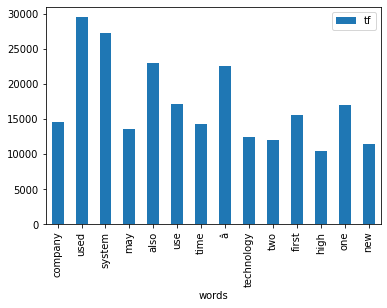

In [219]:
tf[tf["tf"] > 10000].plot.bar(x="words", y="tf");

### **Adım 3:** Kelimeleri WordCloud ile görselleştiriniz.

In [220]:
text = " ".join(i for i in df["TEXT"])

In [221]:
wordcloud = WordCloud()

In [222]:
wordcloud = wordcloud.generate(text)

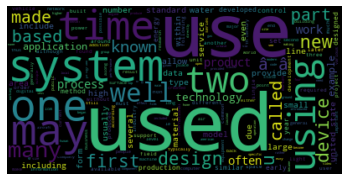

In [223]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız.**

### **Adım 1:** Metin ön işleme işlemlerini gerçekleştiriniz.

### **Adım 2:** Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.

### **Adım 3:** Fonksiyonu açıklayan 'docstring' yazınız.


In [224]:
def preprocessing_visualization(dataframe, text_col, lower = True, bar_chart = False, word_cloud = False):
  """
  Docstring:
    Bu fonksiyon içine girilen doğal dil işleme üzerine bir veri setini önce Metin Ön İşleme aşamasından geçirip ardından Bar plot ve Word Cloud çıktıları vermektedir.

    Parameters
    ----------
    dataframe: dataframe
        Metinsel değişkeni almak için dataframe i parametre olarak ekledik.

    text_col: Object
        Fonksiyon için gerekli değişken.

    lower: Bool
        Değişken içindeki metinlerin küçük harf ya da büyük harf yapmak için dışarıdan değişkenlik gösterebilen ön tanımlı parametredir.

    bar_chart: Bool
        Bar Grafiği çizdirilsin mi sorusuna cevap olan bir parametre.

    word_cloud: Bool
        Kelime bulutu görseli oluşturulsun mu sorusuna cevap olan bir parametredir.

    Returns
    -------
      Data Frame, Bar Chart, Word Cloud
  """


  # Projeye başlamadan önce rahat çalışabilmek için değişken isimlerini tek tip yazı boyutuna getirelim.
  dataframe.columns = [col.upper() for col in dataframe.columns]

  ################# METİN ÖN İŞLEME #################
  # Büyük küçük harf dönüşümü yapınız.
  if lower:
    dataframe[text_col] = dataframe[text_col].str.lower()
  else:
    dataframe[text_col] = dataframe[text_col].str.upper()

  # Noktalama işaretlerini çıkarınız.
  dataframe[text_col] = dataframe[text_col].str.replace("[^\w\s]", " ")

  # Alt satıra geçmek için kullanılan "\n" ifadesinin çıkarınız.
  dataframe[text_col] = dataframe[text_col].str.replace("\n\n", " ")

  # Numerik ifadeleri çıkarma işlemlerini gerçekleştirmeli.
  dataframe[text_col] = dataframe[text_col].str.replace("\d", " ")

  # Bilgi içermeyen kelimeleri (stopwords) veri setinden çıkarınız.
  sw = stopwords.words("english")
  dataframe[text_col] = dataframe[text_col].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

  # Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.
  tem_df = pd.Series(" ".join(dataframe[text_col]).split()).value_counts()
  drops = tem_df[tem_df <= 2000]
  dataframe[text_col] = dataframe[text_col].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

  # Metinleri tokenize edip sonuçları gözlemleyiniz.
  print(dataframe[text_col].apply(lambda x: TextBlob(x).words).head())
  print(" ")

  # Lemmatization işlemi yapınız.
  dataframe[text_col] = dataframe[text_col].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



  ################# GÖRSELLİŞTİRME #################
  # Barplot Grafiği
  
  if bar_chart:
    tf = dataframe[text_col].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    tf.columns = ["words", "tf"]
    tf.sort_values("tf", ascending=False)
    tf[tf["tf"] > 10000].plot.bar(x = "words", y = "tf");
    plt.show();
    print(" ")

  # Word Cloud - Kelime Bulutu
  if word_cloud:
    text = " ".join(i for i in dataframe[text_col])
    wordcloud = WordCloud()
    wordcloud = wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show(block = True);
    print(" ")


  return dataframe

In [225]:
df = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/4.Doğal Dil İşlemeye Giriş/2.Proje: WIKIMEDIA Metin Ön İşleme ve Görselleştirme/wiki_data/wiki_data.csv")

In [226]:
preprocessing_visualization(df, "TEXT").head()

0    [computer, services, company, based, founded, ...
1    [also, known, device, information, usually, st...
2    [â, â, circuit, design, technical, designed, s...
3    [became, part, allows, access, ground, used, u...
4    [used, lower, light, form, used, light, device...
Name: TEXT, dtype: object
 


,UNNAMED: 0,TEXT
0,1,computer service company based founded public ...
1,2,also known device information usually state im...
2,3,â â circuit design technical designed several ...
3,4,became part allows access ground used u data s...
4,5,used lower light form used light device usuall...


**Bar Grafiği**

0    [computer, service, company, based, founded, p...
1    [also, known, device, information, usually, st...
2    [â, â, circuit, design, technical, designed, s...
3    [became, part, allows, access, ground, used, u...
4    [used, lower, light, form, used, light, device...
Name: TEXT, dtype: object
 


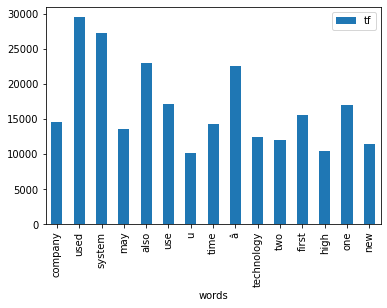

,UNNAMED: 0,TEXT
0,1,computer service company based founded public ...
1,2,also known device information usually state im...
2,3,â â circuit design technical designed several ...
3,4,became part allows access ground used u data s...
4,5,used lower light form used light device usuall...


In [227]:
preprocessing_visualization(df, "TEXT", bar_chart = True).head()

**Word Cloud**

0    [computer, service, company, based, founded, p...
1    [also, known, device, information, usually, st...
2    [â, â, circuit, design, technical, designed, s...
3    [became, part, allows, access, ground, used, u...
4    [used, lower, light, form, used, light, device...
Name: TEXT, dtype: object
 


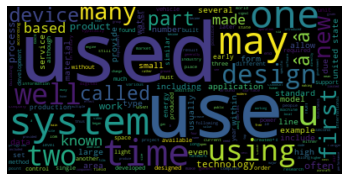

,UNNAMED: 0,TEXT
0,1,computer service company based founded public ...
1,2,also known device information usually state im...
2,3,â â circuit design technical designed several ...
3,4,became part allows access ground used u data s...
4,5,used lower light form used light device usuall...


In [228]:
preprocessing_visualization(df, "TEXT", word_cloud = True).head()